In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
#load data set
df = pd.read_csv('train.csv')

#Data Exploration and cleaning

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


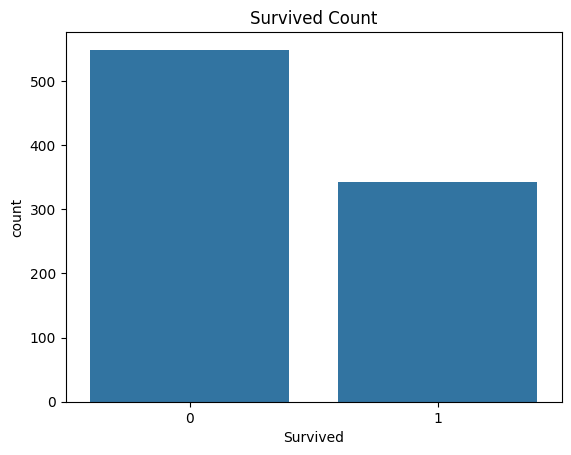

In [9]:
#visualizing survival count
sns.countplot(x='Survived', data = df )
plt.title("Survived Count")
plt.show()

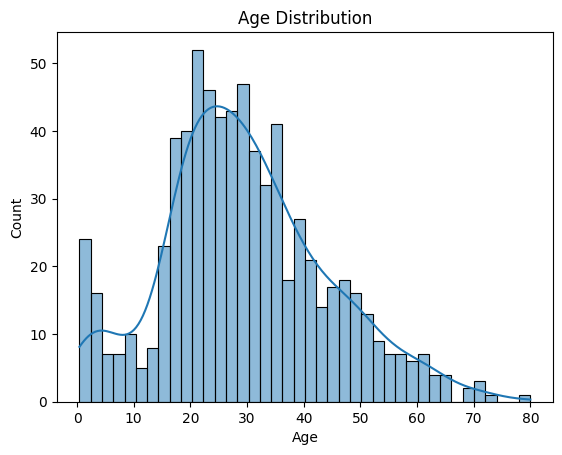

In [12]:
#age distribution
sns.histplot(df['Age'].dropna(),bins=40,kde=True)
plt.title('Age Distribution')
plt.show()

#Data Cleaning


In [26]:
# Handling Missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [44]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [28]:
print(df['Cabin'].isnull().sum() / len(df))


0.7710437710437711


In [45]:
#droping cabin and rows with missing 'embarked'
df.drop(['Cabin'],axis=1,inplace=True)
df.dropna(subset=['Embarked'],inplace=True)

In [30]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#convert Categorical Variables

In [46]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [47]:
#one hot encoding for embarked
df = pd.get_dummies(df,columns=['Embarked'], drop_first=False)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


#Feature Engineering

In [48]:
#creating Familysize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [49]:
df['AgeGroup']= pd.cut(df['Age'],bins=[0,12,20,40,60,80],labels=['child','Teenager','Adult','Middle-Aged','Senior'])
df= pd.get_dummies(df,columns=['AgeGroup'],drop_first=True)

In [50]:
#choosing the relevant features

features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize','Embarked_C', 'Embarked_Q', 'Embarked_S']
x = df[features]
y = df['Survived']


#Model Selection

In [51]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#logistic Regreession

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [57]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [58]:
#pridict using log reg
y_pred_log = log_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [59]:
accuracy_score(y_test,y_pred_log)

0.6235955056179775

In [61]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       109
           1       0.75      0.04      0.08        69

    accuracy                           0.62       178
   macro avg       0.69      0.52      0.42       178
weighted avg       0.67      0.62      0.50       178



#Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred_tree = tree_model.predict(x_test)
accuracy_score(y_test,y_pred_tree)

0.7528089887640449

In [65]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.65      0.77      0.71        69

    accuracy                           0.75       178
   macro avg       0.74      0.76      0.75       178
weighted avg       0.76      0.75      0.76       178



#Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred_rf = rf_model.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.7752808988764045

#model Evaluation

In [74]:
from sklearn.metrics import confusion_matrix

In [73]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [72]:
print(confusion_matrix(y_test,y_pred_rf))

[[86 23]
 [17 52]]


#hyperparameter Tuning

In [75]:
#optimize model performance by tuning hyperparameters

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#random forest
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30]
}
grid_search = GridSearchCV(estimator = rf_model,param_grid = param_grid,cv=3)
grid_search.fit(x_train,y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [78]:
best_model = grid_search.best_estimator_
final_predictions = best_model.predict(x_test)

In [79]:
print(confusion_matrix(y_test,final_predictions))

[[92 17]
 [17 52]]


In [80]:
print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178




### Final Insights
- **Best Model**: The tuned Random Forest model stands out as the most effective model, with the highest accuracy and balanced performance across both classes. Its ability to handle class imbalance better than the other models makes it suitable for this application.
- **Class Imbalance**: The initial struggle of Logistic Regression highlights the challenge of class imbalance in this dataset. Strategies such as resampling, using different thresholds, or implementing class weights could further enhance the performance.
- **Further Exploration**: Given the improvements from hyperparameter tuning, exploring additional tuning methods or trying other models (like Gradient Boosting) could yield even better results.

In summary, while all models showed varying degrees of performance, the Random Forest model (especially after tuning) emerged as the most reliable choice for predicting Titanic survival, balancing the trade-offs between precision and recall effectively.